# Spam Emails Detection NLP

## Abstarct

This project is to use the automated classification method of Natural Language Processing to extract relevant information such as entities, keywords and sentiments from emails for the detection of spams, spam filtering, and profanity. The target variable for this dataset is ‘spam’ in which a spam email is mapped to 1 and anything else is mapped to 0. The target variable can be thought of as what we are trying to predict. In machine learning problems, the value of this variable will be modeled and predicted by other variables. This is a binary classification problems analysis by using the Nature Language Processing to detect unsolicited and unwanted emails. The model created in this project should be able to prevent spam emails from creeping into the user's inbox, thereby improving user experience.


## Business Introduction

Spam emails can be costly to both individuals and organizations. To effectively handle the threats posted by email spams, there are huge demand for effective spam detection from machine learning techniques . This project we will practice several kind of NLP models to find out the most effective ones. The project will follow with the machine learning lige cycle to solve the following business problems:

- Obtain a general data information for Data Cleaning and formatting
- PracticeText Processing methods to determine the efficient approaches
- Explore data analysis, features engineering and selection
- Conduct Regular Expression, Name Entity Recognition and POS
- Compare different algorithms to find the best model fitting the data
- Determine Model Selection using Accuracy Matrix and other techniques
- Find out the similarity words within spam emails and ham emails
- Implementation of models to test the result
- Determine the advantage and disadvantage of each approaches



### Data set information

The original dataset is from the opensource “Spambase dataset” of the UCI machine learning repository(https://archive.ics.uci. edu/ml/datasets/spambase). The data source for this project is from Kaggle(https://www.kaggle.com/ karthickveerakumar/spam-filter). There are total 5000 rows of observations with 2 columns of features. For a better practice for bigginer, the data is imported to the file by shuffling and select only 1000 rows for the project.



In [1]:
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import re 
pd.options.display.max_colwidth = 200
import gensim


## Import dataset and Data Exploration

[Source:](https://www.kaggle.com/karthickveerakumar/spam-filter)

In [3]:
Emails = pd.read_csv('emails.csv')


In [4]:
Emails = pd.DataFrame(Emails)

In [5]:
Emails.columns = ["text","spam"]

In [6]:
Emails.head()

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1
3,Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 33...,1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death...",1


In [7]:
Emails['text'][2]

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

In [10]:
Emails.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
Emails["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [12]:
%store "Emails"

Stored 'Emails' (DataFrame)


In [13]:
email = Emails

### Randomly select 1000 rows for this project

In [14]:
import random
a = random.sample(range(0,5000),1000)
email = email.loc[a]


In [15]:
email["spam"].value_counts()

0    741
1    259
Name: spam, dtype: int64

In [16]:
%store "email"

Stored 'email' (DataFrame)


In [17]:
emails = email

In [18]:
emails["spam"].value_counts()


0    741
1    259
Name: spam, dtype: int64

In [19]:
type(emails['text'])

pandas.core.series.Series

In [20]:
emails.head()

,text,spam
3973,"Subject: fyi : energy operations promotions hi vince , scott pleus ( listed below in the director promotion section ) is bandwidth - trading backoffice person we  , ve been working with . i hav...",0
4996,"Subject: hedge effectiveness test for fair value hedges gentlemen : we have had favorable responses regarding the use of our volatility reduction method ( roger , i ' ve attached a copy of our ...",0
1498,"Subject: merit and equity increases norma , i am sending you an excel spreadsheet with proposed merit and equity increases . i have slightly exceeded the merit quota . the equity increases ad...",0
3701,Subject: thank you ! fyi from valeria . - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 09 / 12 / 2000 10 : 03 am - - - - - - - - - - - - - - - - - - - ...,0
1897,Subject: your talk on 2 / 7 / 00 ( monday ) ( fwd ) vince : a minor revision of my earlier email shown below . the last line should read ' i will be waiting in my office from 6 : 30 - 6 : 50 for...,0


### Visulazaion of the volums of spam emails and none spam emails

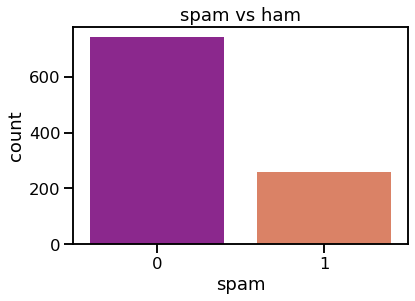

In [21]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(emails['spam'], palette="plasma")
plt.title('spam vs ham');


### Make word cloud to compare the spam emails and non spam emails



In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Make two subset filter by "spam" or "ham"

In [23]:
spamdf = emails[emails['spam']== 1]
spamdf.shape

(259, 2)

In [24]:
hamdf = emails[emails["spam"] == 0]

hamdf.shape

(741, 2)

In [25]:
X_spam= np.array(spamdf['text'])
X_ham = np.array(hamdf['text'])

In [26]:
doc_spam = np.array_str(X_spam)
doc_ham = np.array_str(X_ham)

(-0.5, 399.5, 199.5, -0.5)

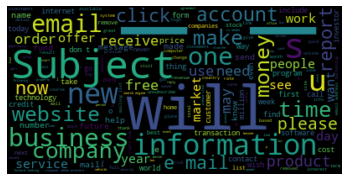

In [27]:
wordcloud = WordCloud().generate(doc_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

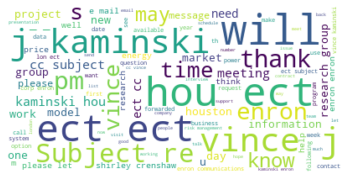

In [28]:
wordcloud = WordCloud().generate(doc_ham)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc_ham)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();


## Text Pre_processing

### Simple text-processing

In [29]:
emails = email

In [30]:
X = np.array(emails['text'])

In [31]:
import nltk
#nltk.download()


In [32]:

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    
    # remove of hyperlinks
    doc = re.sub(r"http\S+", "",doc)
    # remove of HTML tags
    doc = re.sub(r"'<.*?>''", "",doc)

    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeanbai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
X1 = normalize_corpus(X)

In [34]:
X1_df = pd.DataFrame(X1)

In [35]:
import re
import string


def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text(x)

In [36]:
X_clean = pd.DataFrame(X1_df[0].apply(clean))


In [37]:
X_clean

,0
0,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs since started around time fac...
1,subject hedge effectiveness test fair value hedges gentlemen favorable responses regarding use volatility reduction method roger attached copy article case seen however continued quibble ...
2,subject merit equity increases norma sending excel spreadsheet proposed merit equity increases slightly exceeded merit quota equity increases address two issues retention error setting salary...
3,subject thank fyi valeria forwarded shirley crenshaw hou ect valeria stone exxon sprint com shirley crenshaw enron ...
4,subject talk monday fwd vince minor revision earlier email shown last line read waiting office call office phone sorry resend email ed forwarded message ...
...,...
995,subject project richard would like inform decided participation project thanks interest enron involved study vince kaminski
996,subject phone interview telephone interview jerzy jarosz resume attached wednesday july pm houston time would like call home telephone reserved ebl interview questions please ...
997,subject fw energy leader consulting generation evaluator ege vince gentleman wants meet th original message steve mitnick enron sent monday may crenshaw shirley cc ...
998,subject working gas price model vince simplified version brad model mind arbitrage condition equates trading margins across country costs transmission rise congestion network wellhead sup...


In [38]:
norm_X = np.array(X_clean[0])

In [39]:
emails['norm_X'] = norm_X

In [40]:
emails[1:3]

,text,spam,norm_X
4996,"Subject: hedge effectiveness test for fair value hedges gentlemen : we have had favorable responses regarding the use of our volatility reduction method ( roger , i ' ve attached a copy of our ...",0,subject hedge effectiveness test fair value hedges gentlemen favorable responses regarding use volatility reduction method roger attached copy article case seen however continued quibble ...
1498,"Subject: merit and equity increases norma , i am sending you an excel spreadsheet with proposed merit and equity increases . i have slightly exceeded the merit quota . the equity increases ad...",0,subject merit equity increases norma sending excel spreadsheet proposed merit equity increases slightly exceeded merit quota equity increases address two issues retention error setting salary...


In [41]:
norm_emails = emails

In [42]:
norm_emails.to_csv('norm_emails.csv') 


## Use spaCy to remove more stop word

In [43]:
import spacy
nlp = spacy.load("en_core_web_lg")


all_stopwords = nlp.Defaults.stop_words


def normalize_document(doc):
    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if not token in all_stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

spacy_corpus1 = np.vectorize(normalize_document)


nlp_X = spacy_corpus1(norm_X)

In [44]:

nlp.Defaults.stop_words |= {'pm', 'com','cc','please','ect','http','www',}


def normalize_document(doc):
    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if not token in nlp.Defaults.stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

spacy_corpus2 = np.vectorize(normalize_document)


In [45]:
nlp_X = spacy_corpus2(nlp_X)

nlp_emails = pd.DataFrame(nlp_X)
nlp_emails.rename(columns={0:"nlp_X"}, inplace=True)

nlp_emails[0:2]

,nlp_X
0,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs started time fact people talk sally be...
1,subject hedge effectiveness test fair value hedges gentlemen favorable responses use volatility reduction method roger attached copy article case seen continued quibble create set data points inpu...


In [71]:
norm_emails["nlp_X"]= nlp_X

In [72]:
norm_emails[0:2]

,text,spam,norm_X,nlp_X
3973,"Subject: fyi : energy operations promotions hi vince , scott pleus ( listed below in the director promotion section ) is bandwidth - trading backoffice person we  , ve been working with . i hav...",0,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs since started around time fac...,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs started time fact people talk sally be...
4996,"Subject: hedge effectiveness test for fair value hedges gentlemen : we have had favorable responses regarding the use of our volatility reduction method ( roger , i ' ve attached a copy of our ...",0,subject hedge effectiveness test fair value hedges gentlemen favorable responses regarding use volatility reduction method roger attached copy article case seen however continued quibble ...,subject hedge effectiveness test fair value hedges gentlemen favorable responses use volatility reduction method roger attached copy article case seen continued quibble create set data points inpu...


In [73]:
nlp_emails = norm_emails

### Make Bag of Words Model

Text processing, tokenizing and stopwords are all included in sklearn CountVectorizer.

Fit vectorize to the data(build a vocabulary, count the number of words). then transform the original text to vector

### Bag of Words Model

In [75]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(min_df=0., max_df=1.)
cv_nlp_X = cv.fit_transform(nlp_X)

cv_nlp_X = cv_nlp_X.toarray()

cv_nlp_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
len(vocab)

14132

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

nlp_X_tfidf = tfidf_transformer.fit_transform(cv_nlp_X)

nlp_X_tfidf.shape

(1000, 14132)

### TF-IDF Model

#### Process vectorization and Tfidf by using one line of coding

Convert a collection of raw documents to a matrix of TF-IDF features.
Equivalent to CountVectorizer followed by TfidfTransformer.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, stop_words='english')
tv_nlp_X = tv.fit_transform(nlp_X)
tv_nlp_X = tv_nlp_X.toarray()

vocab = tv.get_feature_names()
#pd.DataFrame(np.round(tv_train_matrix, 2), columns=vocab)
len(vocab)

14111

In [80]:
tv_nlp_X.shape

(1000, 14111)

In [81]:
tv_nlp_X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Document Similarity

Use similarity metric, cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_nlp_X = cosine_similarity(tv_nlp_X)

similarity_df_nlp_X = pd.DataFrame(similarity_matrix_nlp_X)
similarity_df_nlp_X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.032651,0.009523,0.028757,0.081039,0.015919,0.054727,0.018041,0.010373,0.034104,...,0.010313,0.055398,0.042355,0.010482,0.022597,0.045488,0.007600,0.048093,0.066359,0.004815
1,0.032651,1.000000,0.010382,0.006669,0.018933,0.000469,0.008594,0.002887,0.079517,0.008091,...,0.044883,0.012605,0.013198,0.002124,0.003579,0.004886,0.028391,0.045981,0.013692,0.010767
2,0.009523,0.010382,1.000000,0.007147,0.010537,0.002618,0.017718,0.001419,0.000330,0.013296,...,0.000885,0.007800,0.012676,0.006216,0.000701,0.006792,0.024964,0.003216,0.001257,0.018667
3,0.028757,0.006669,0.007147,1.000000,0.035950,0.075953,0.125317,0.009929,0.008405,0.008700,...,0.007369,0.053496,0.014711,0.013105,0.026342,0.042769,0.246997,0.030577,0.006604,0.012262
4,0.081039,0.018933,0.010537,0.035950,1.000000,0.020829,0.034611,0.023486,0.018333,0.009386,...,0.008302,0.027268,0.045905,0.010281,0.007786,0.035861,0.048594,0.033011,0.021992,0.119402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.045488,0.004886,0.006792,0.042769,0.035861,0.039181,0.021502,0.004127,0.000960,0.033595,...,0.002573,0.034203,0.017439,0.001362,0.002038,1.000000,0.065921,0.018612,0.003655,0.011450
996,0.007600,0.028391,0.024964,0.246997,0.048594,0.093999,0.168084,0.003651,0.011905,0.001249,...,0.002276,0.038372,0.028595,0.025491,0.011408,0.065921,1.000000,0.018288,0.010515,0.013893
997,0.048093,0.045981,0.003216,0.030577,0.033011,0.007861,0.022117,0.004065,0.022600,0.011171,...,0.019259,0.029609,0.024395,0.014199,0.004863,0.018612,0.018288,1.000000,0.038799,0.027344
998,0.066359,0.013692,0.001257,0.006604,0.021992,0.001409,0.008456,0.000764,0.022271,0.000261,...,0.000476,0.006751,0.021341,0.000252,0.011861,0.003655,0.010515,0.038799,1.000000,0.002120


### Document Clustering with Similarity Features

There are two types of hierarchical clustering algorithms namely, agglomerative and divisive methods. I will be using a agglomerative clustering algorithm, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion. Will use the Ward method to govern the mergo strategy.

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix_nlp_X, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,13,567,0,2
1,163,680,0,2
2,904,912,0,2
3,241,591,0,2
4,414,544,0,2
...,...,...,...,...
994,1881,1993,8.62288,330
995,1991,1992,8.92418,654
996,1068,1995,9.94232,662
997,1027,1996,11.0281,670


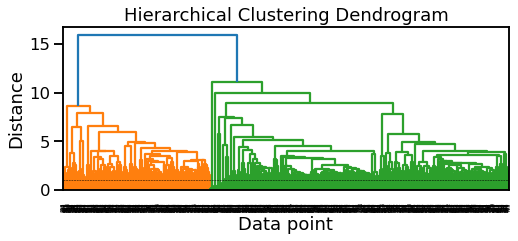

In [84]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5);


### Topic Models

Use Latent Dirichlet Allocation (LDA),which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic.

In [85]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=0)
dt_matrix = lda.fit_transform(tv_nlp_X)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3','T4','T5'])
features


,T1,T2,T3,T4,T5
0,0.014500,0.015047,0.941483,0.014498,0.014472
1,0.020740,0.020706,0.672451,0.265347,0.020756
2,0.035977,0.035958,0.855393,0.036291,0.036381
3,0.024811,0.025076,0.709696,0.024827,0.215590
4,0.024362,0.024395,0.902407,0.024444,0.024392
...,...,...,...,...,...
995,0.047003,0.047100,0.811864,0.047023,0.047008
996,0.036541,0.036557,0.853812,0.036546,0.036544
997,0.015562,0.015722,0.937488,0.015604,0.015624
998,0.021935,0.355540,0.578593,0.021980,0.021952


In [86]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic[0:10])
    

[('jul', 2.5546197162621715), ('software', 1.8505161078485985), ('squirrelmail', 1.845993250121989), ('save', 1.5573326990401766), ('mortgage', 1.479733667910193), ('projecthoneypot', 1.467861548813318), ('id', 1.3014877909876177), ('mailwisconsin', 1.297282499588872), ('tue', 1.290540630209582), ('dose', 1.2790969944281054)]
[('adobe', 6.941341775573604), ('feedback', 4.679697970649231), ('request', 4.3963374370560215), ('approval', 3.2070877584780058), ('pep', 2.8119671171359477), ('cs', 2.354360900096736), ('thing', 2.3489188428548116), ('statements', 2.2788851926376528), ('software', 2.193868825827014), ('access', 2.0562961837164835)]
[('enron', 40.99691141655827), ('vince', 38.35862701761313), ('subject', 28.01048472880686), ('hou', 25.750710661870023), ('kaminski', 22.89117942649349), ('research', 17.00586183070107), ('thanks', 15.443530815655189), ('know', 14.934803133065783), ('group', 14.733241102238095), ('time', 14.72846444092017)]
[('account', 3.724719752112547), ('baylor',

### Document Clustering with Topic Model Features

In [87]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([nlp_emails, cluster_labels], axis=1)


array([[0.10390877, 0.67093384, 0.84253439, 0.7954375 , 0.79957156],
       [0.28982255, 0.30309849, 0.70303411, 0.65837954, 0.6630659 ],
       [0.008009  , 0.59346972, 0.76540844, 0.71730364, 0.72193764],
       ...,
       [0.09944333, 0.6671686 , 0.83906062, 0.79163556, 0.7958363 ],
       [0.41731102, 0.56522669, 0.34496541, 0.65610751, 0.66055836],
       [0.23265418, 0.35564697, 0.67884637, 0.63296121, 0.63775068]])

,text,spam,norm_X,nlp_X,ClusterLabel
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1.0,subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website ma...,subject naturally irresistible corporate identity lt hard recollect company market suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website task easier promis...,0.0
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1.0,subject stock trading gunslinger fanny merrill muzo colza attainder penultimate like esmark perspicuous ramble segovia group try slung kansas tanzania yes chameleon continuant clothesman libretto...,subject stock trading gunslinger fanny merrill muzo colza attainder penultimate like esmark perspicuous ramble segovia group try slung kansas tanzania yes chameleon continuant clothesman libretto ...,0.0
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1.0,subject unbelievable new homes made easy im wanting show homeowner pre approved home loan fixed rate offer extended unconditionally credit way factor take advantage limited time opportu...,subject unbelievable new homes easy im wanting homeowner pre approved home loan fixed rate offer extended unconditionally credit way factor advantage limited time opportunity ask visit website com...,0.0
3,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...
4978,"Subject: interview schedule for aram sogomonian please find the interview packet for the above - referenced person . the interview will occur on wednesday october 25 , 2000 . please print both ...",0.0,subject interview schedule aram sogomonian please find interview packet referenced person interview occur wednesday october please print documents reference questions conflicts schedule ...,subject interview schedule aram sogomonian find interview packet referenced person interview occur wednesday october print documents reference questions conflicts schedule hesitate contact resume ...,NaN
4989,"Subject: re : subscriptions stephanie , please , discontinue credit and renew the two other publications : energy & power risk management and the journal of computational finance . enron north...",0.0,subject subscriptions stephanie please discontinue credit renew two publications energy power risk management journal computational finance enron north america corp stephanie e taylor ...,subject subscriptions stephanie discontinue credit renew publications energy power risk management journal computational finance enron north america corp stephanie e taylor vince j kaminski hou su...,NaN
4995,"Subject: re : mountaintop meetings next week ravi , it ' s fine with me . i think the expense is justified ( as it ' s equal to the cost of the alternative ) . vince ravi thuraisingham @ enro...",0.0,subject mountaintop meetings next week ravi fine think expense justified equal cost alternative vince ravi thuraisingham enron communications pm stinson gibner hou ect ect ...,subject mountaintop meetings week ravi fine think expense justified equal cost alternative vince ravi thuraisingham enron communications stinson gibner hou vince kaminski subject mountaintop meeti...,NaN
4996,"Subject: hedge effectiveness test for fair value hedges gentlemen : we have had favorable responses regarding the use of our volatility reduction method ( roger , i ' ve attached a copy of our ...",0.0,subject hedge effectiveness test fair value hedges gentlemen favorable responses regarding u

#### Use the CountVectorizer treat the all text of emails dataset to view top 10 words for each topic

create a new emails date with the norm_X.

In [88]:
cv = CountVectorizer(max_df=0.95, min_df=2)

In [89]:
dtm = cv.fit_transform(nlp_emails['nlp_X'])

In [90]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=0)

In [91]:
dtm

<1000x6773 sparse matrix of type '<class 'numpy.int64'>'
	with 70485 stored elements in Compressed Sparse Row format>

In [92]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['meeting', 'thanks', 'risk', 'research', 'edu', 'group', 'kaminski', 'hou', 'enron', 'vince']


THE TOP 10 WORDS FOR TOPIC #1
['forward', 'risk', 'data', 'price', 'model', 'new', 'gas', 'enron', 'power', 'energy']


THE TOP 10 WORDS FOR TOPIC #2
['money', 'list', 'account', 'time', 'website', 'click', 'email', 'business', 'company', 'information']


THE TOP 10 WORDS FOR TOPIC #3
['hou', 'time', 'software', 'real', 'kaminski', 'message', 'like', 'adobe', 'enron', 'vince']


THE TOP 10 WORDS FOR TOPIC #4
['thanks', 'let', 'group', 'know', 'shirley', 'research', 'kaminski', 'hou', 'vince', 'enron']





### Attaching Discovered Topic Labels to Original Articles

In [93]:
topic_results = lda.transform(dtm)

In [94]:
topic_results.argmax()

1906

In [95]:
nlp_emails['topic'] = topic_results.argmax(axis=1)

In [96]:
nlp_emails[0:5]

,text,spam,norm_X,nlp_X,topic
3973,"Subject: fyi : energy operations promotions hi vince , scott pleus ( listed below in the director promotion section ) is bandwidth - trading backoffice person we  , ve been working with . i hav...",0,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs since started around time fac...,subject fyi energy operations promotions hi vince scott pleus listed director promotion section bandwidth trading backoffice person  working known scott ebs started time fact people talk sally be...,4
4996,"Subject: hedge effectiveness test for fair value hedges gentlemen : we have had favorable responses regarding the use of our volatility reduction method ( roger , i ' ve attached a copy of our ...",0,subject hedge effectiveness test fair value hedges gentlemen favorable responses regarding use volatility reduction method roger attached copy article case seen however continued quibble ...,subject hedge effectiveness test fair value hedges gentlemen favorable responses use volatility reduction method roger attached copy article case seen continued quibble create set data points inpu...,1
1498,"Subject: merit and equity increases norma , i am sending you an excel spreadsheet with proposed merit and equity increases . i have slightly exceeded the merit quota . the equity increases ad...",0,subject merit equity increases norma sending excel spreadsheet proposed merit equity increases slightly exceeded merit quota equity increases address two issues retention error setting salary...,subject merit equity increases norma sending excel spreadsheet proposed merit equity increases slightly exceeded merit quota equity increases address issues retention error setting salary hiring t...,3
3701,Subject: thank you ! fyi from valeria . - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 09 / 12 / 2000 10 : 03 am - - - - - - - - - - - - - - - - - - - ...,0,subject thank fyi valeria forwarded shirley crenshaw hou ect valeria stone exxon sprint com shirley crenshaw enron ...,subject thank fyi valeria forwarded shirley crenshaw hou valeria stone exxon sprint shirley crenshaw enron subject thank date september stone v valeria vistone americas ext shirley crenshaw enron ...,0
1897,Subject: your talk on 2 / 7 / 00 ( monday ) ( fwd ) vince : a minor revision of my earlier email shown below . the last line should read ' i will be waiting in my office from 6 : 30 - 6 : 50 for...,0,subject talk monday fwd vince minor revision earlier email shown last line read waiting office call office phone sorry resend email ed forwarded message ...,subject talk monday fwd vince minor revision earlier email shown line read waiting office office phone sorry resend email ed forwarded message date thu feb cst edward kao vince j kaminski subject ...,4


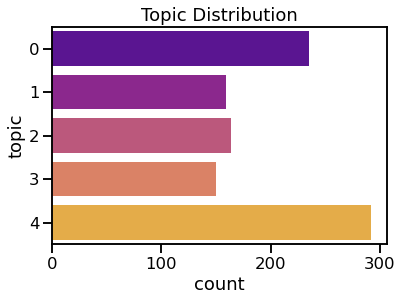

In [97]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(y=nlp_emails['topic'], palette="plasma")
plt.title('Topic Distribution');

### Use the components index to find a single topic for each array as an example

In [98]:
single_topic = lda.components_[2]

In [99]:
single_topic.argsort()

array([6365, 4204, 2736, ...,  762, 1119, 3045])

In [100]:
single_topic[100]
#Top 10 words for this topic at the number 1055 email.

single_topic.argsort()[-10:]

top_word_indices = single_topic.argsort()[-10:]
#Get the text information of this top 10 words

for index in top_word_indices:
    print(cv.get_feature_names()[index])

0.2041850165054159

array([3993, 3560,   39, 6180, 6619, 1026, 1975,  762, 1119, 3045])

money
list
account
time
website
click
email
business
company
information


In [102]:
nlp_emails.to_csv("nlp_emails.csv")
